# Deep Learning + Wang-Landau
---

Simple notebook implementing project. Replaces `main.py` in `deep_learning` package.

By: William Tong (wlt2115)

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt 
import numpy as np
from scipy.special import softmax
import tensorflow as tf

from deep_learning import model as md
from deep_learning import util

%matplotlib inline
%config IPCompleter.greedy=True

## Global configs

In [21]:
LOG_DIR = Path(r'/home/grandpaa/workspace/deep_learning/logs')

RUN_NAME = 'abs/simple'
# TB_DIR = LOG_DIR / 'tensorboard' / RUN_NAME
WL_DIR = LOG_DIR / 'wang_landau' / RUN_NAME

## Helper functions

In [3]:
def _get_density(values: list) -> list:
    total = sum(values)
    densities = [value / total for value in values]
    
    return densities

## Define model / energy func

In [22]:
n = 50
energy_func = md.make_simple_abs(n)

## Investigating domain

max: 14.767523
min: 0.178964


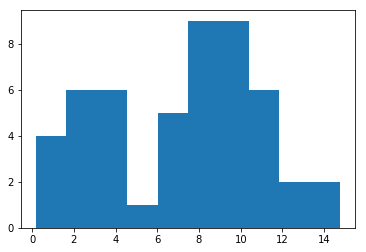

In [27]:
rand_samp = zip(*[util.rand_sample(n, (-1, 1)) for _ in range(2)])
energies = [energy_func(point) for point in rand_samp]

plt.hist(energies)
print("max: %f\nmin: %f" % (max(energies), min(energies)))

## Release the Dragons!

In [28]:
num_dims = 2

wl_configs = {
    'energy' : energy_func,
    
    'domain': np.array([-2, 2]*num_dims).reshape(num_dims, -1),
    'energy_range': (0, 80),
    'resolution': 0.75,

    'flatness': 0.9,
    'step_size': 1,

    'max_iterations': 10000000,
    'check_every': 400,
    'save_every': 2000,
    'log_dir': WL_DIR
}

freqs, hist = util.wang_landau(**wl_configs)

INFO:root:Iteration 400 f=1.000000
INFO:root:At check, min: 1.000000 mean: 7.692308
INFO:root:Iteration 800 f=1.000000
INFO:root:At check, min: 1.000000 mean: 14.035088
INFO:root:Iteration 1200 f=1.000000
INFO:root:At check, min: 1.000000 mean: 20.689655
INFO:root:Iteration 1600 f=1.000000
INFO:root:At check, min: 1.000000 mean: 27.118644
INFO:root:Iteration 2000 f=1.000000
INFO:root:At check, min: 1.000000 mean: 33.333333
INFO:root:Iteration 2400 f=1.000000
INFO:root:At check, min: 1.000000 mean: 40.000000
INFO:root:Iteration 2800 f=1.000000
INFO:root:At check, min: 1.000000 mean: 46.666667
INFO:root:Iteration 3200 f=1.000000
INFO:root:At check, min: 1.000000 mean: 53.333333
INFO:root:Iteration 3600 f=1.000000
INFO:root:At check, min: 1.000000 mean: 60.000000
INFO:root:Iteration 4000 f=1.000000
INFO:root:At check, min: 1.000000 mean: 66.666667
INFO:root:Iteration 4400 f=1.000000
INFO:root:At check, min: 1.000000 mean: 73.333333
INFO:root:Iteration 4800 f=1.000000
INFO:root:At check, m

INFO:root:Iteration 37200 f=0.250000
INFO:root:At check, min: 69.000000 mean: 93.333333
INFO:root:Iteration 37600 f=0.250000
INFO:root:At check, min: 69.000000 mean: 100.000000
INFO:root:Iteration 38000 f=0.250000
INFO:root:At check, min: 69.000000 mean: 106.666667
INFO:root:Iteration 38400 f=0.250000
INFO:root:At check, min: 74.000000 mean: 113.333333
INFO:root:Iteration 38800 f=0.250000
INFO:root:At check, min: 74.000000 mean: 120.000000
INFO:root:Iteration 39200 f=0.250000
INFO:root:At check, min: 101.000000 mean: 126.666667
INFO:root:Iteration 39600 f=0.250000
INFO:root:At check, min: 101.000000 mean: 133.333333
INFO:root:Iteration 40000 f=0.250000
INFO:root:At check, min: 101.000000 mean: 140.000000
INFO:root:Iteration 40400 f=0.250000
INFO:root:At check, min: 101.000000 mean: 146.666667
INFO:root:Iteration 40800 f=0.250000
INFO:root:At check, min: 101.000000 mean: 153.333333
INFO:root:Iteration 41200 f=0.250000
INFO:root:At check, min: 101.000000 mean: 160.000000
INFO:root:Iterat

INFO:root:Histogram flat at iteration 73200
INFO:root:Iteration 73600 f=0.031250
INFO:root:At check, min: 1.000000 mean: 8.333333
INFO:root:Iteration 74000 f=0.031250
INFO:root:At check, min: 1.000000 mean: 14.814815
INFO:root:Iteration 74400 f=0.031250
INFO:root:At check, min: 1.000000 mean: 21.052632
INFO:root:Iteration 74800 f=0.031250
INFO:root:At check, min: 2.000000 mean: 27.118644
INFO:root:Iteration 75200 f=0.031250
INFO:root:At check, min: 4.000000 mean: 33.898305
INFO:root:Iteration 75600 f=0.031250
INFO:root:At check, min: 7.000000 mean: 40.000000
INFO:root:Iteration 76000 f=0.031250
INFO:root:At check, min: 7.000000 mean: 46.666667
INFO:root:Iteration 76400 f=0.031250
INFO:root:At check, min: 17.000000 mean: 53.333333
INFO:root:Iteration 76800 f=0.031250
INFO:root:At check, min: 23.000000 mean: 60.000000
INFO:root:Iteration 77200 f=0.031250
INFO:root:At check, min: 26.000000 mean: 66.666667
INFO:root:Iteration 77600 f=0.031250
INFO:root:At check, min: 26.000000 mean: 73.333

INFO:root:Iteration 110000 f=0.015625
INFO:root:At check, min: 144.000000 mean: 206.666667
INFO:root:Iteration 110400 f=0.015625
INFO:root:At check, min: 144.000000 mean: 213.333333
INFO:root:Iteration 110800 f=0.015625
INFO:root:At check, min: 144.000000 mean: 220.000000
INFO:root:Iteration 111200 f=0.015625
INFO:root:At check, min: 144.000000 mean: 226.666667
INFO:root:Iteration 111600 f=0.015625
INFO:root:At check, min: 146.000000 mean: 233.333333
INFO:root:Iteration 112000 f=0.015625
INFO:root:At check, min: 146.000000 mean: 240.000000
INFO:root:Iteration 112400 f=0.015625
INFO:root:At check, min: 146.000000 mean: 246.666667
INFO:root:Iteration 112800 f=0.015625
INFO:root:At check, min: 146.000000 mean: 253.333333
INFO:root:Iteration 113200 f=0.015625
INFO:root:At check, min: 146.000000 mean: 260.000000
INFO:root:Iteration 113600 f=0.015625
INFO:root:At check, min: 210.000000 mean: 266.666667
INFO:root:Iteration 114000 f=0.015625
INFO:root:At check, min: 216.000000 mean: 273.333333

INFO:root:At check, min: 184.000000 mean: 260.000000
INFO:root:Iteration 146400 f=0.007812
INFO:root:At check, min: 191.000000 mean: 266.666667
INFO:root:Iteration 146800 f=0.007812
INFO:root:At check, min: 194.000000 mean: 273.333333
INFO:root:Iteration 147200 f=0.007812
INFO:root:At check, min: 201.000000 mean: 280.000000
INFO:root:Iteration 147600 f=0.007812
INFO:root:At check, min: 201.000000 mean: 286.666667
INFO:root:Iteration 148000 f=0.007812
INFO:root:At check, min: 207.000000 mean: 293.333333
INFO:root:Iteration 148400 f=0.007812
INFO:root:At check, min: 218.000000 mean: 300.000000
INFO:root:Iteration 148800 f=0.007812
INFO:root:At check, min: 219.000000 mean: 306.666667
INFO:root:Iteration 149200 f=0.007812
INFO:root:At check, min: 222.000000 mean: 313.333333
INFO:root:Iteration 149600 f=0.007812
INFO:root:At check, min: 237.000000 mean: 320.000000
INFO:root:Iteration 150000 f=0.007812
INFO:root:At check, min: 237.000000 mean: 326.666667
INFO:root:Iteration 150400 f=0.007812

INFO:root:At check, min: 1.000000 mean: 20.338983
INFO:root:Iteration 182400 f=0.003906
INFO:root:At check, min: 5.000000 mean: 26.666667
INFO:root:Iteration 182800 f=0.003906
INFO:root:At check, min: 5.000000 mean: 33.333333
INFO:root:Iteration 183200 f=0.003906
INFO:root:At check, min: 11.000000 mean: 40.000000
INFO:root:Iteration 183600 f=0.003906
INFO:root:At check, min: 12.000000 mean: 46.666667
INFO:root:Iteration 184000 f=0.003906
INFO:root:At check, min: 15.000000 mean: 53.333333
INFO:root:Iteration 184400 f=0.003906
INFO:root:At check, min: 15.000000 mean: 60.000000
INFO:root:Iteration 184800 f=0.003906
INFO:root:At check, min: 15.000000 mean: 66.666667
INFO:root:Iteration 185200 f=0.003906
INFO:root:At check, min: 25.000000 mean: 73.333333
INFO:root:Iteration 185600 f=0.003906
INFO:root:At check, min: 29.000000 mean: 80.000000
INFO:root:Iteration 186000 f=0.003906
INFO:root:At check, min: 33.000000 mean: 86.666667
INFO:root:Iteration 186400 f=0.003906
INFO:root:At check, min:

INFO:root:At check, min: 474.000000 mean: 626.666667
INFO:root:Iteration 218800 f=0.003906
INFO:root:At check, min: 510.000000 mean: 633.333333
INFO:root:Iteration 219200 f=0.003906
INFO:root:At check, min: 524.000000 mean: 640.000000
INFO:root:Iteration 219600 f=0.003906
INFO:root:At check, min: 524.000000 mean: 646.666667
INFO:root:Iteration 220000 f=0.003906
INFO:root:At check, min: 558.000000 mean: 653.333333
INFO:root:Iteration 220400 f=0.003906
INFO:root:At check, min: 563.000000 mean: 660.000000
INFO:root:Iteration 220800 f=0.003906
INFO:root:At check, min: 563.000000 mean: 666.666667
INFO:root:Iteration 221200 f=0.003906
INFO:root:At check, min: 570.000000 mean: 673.333333
INFO:root:Iteration 221600 f=0.003906
INFO:root:At check, min: 585.000000 mean: 680.000000
INFO:root:Iteration 222000 f=0.003906
INFO:root:At check, min: 589.000000 mean: 686.666667
INFO:root:Iteration 222400 f=0.003906
INFO:root:At check, min: 592.000000 mean: 693.333333
INFO:root:Iteration 222800 f=0.003906

INFO:root:Iteration 254400 f=0.003906
INFO:root:At check, min: 1109.000000 mean: 1226.666667
INFO:root:Histogram flat at iteration 254400
INFO:root:Iteration 254800 f=0.001953
INFO:root:At check, min: 1.000000 mean: 8.888889
INFO:root:Iteration 255200 f=0.001953
INFO:root:At check, min: 1.000000 mean: 14.545455
INFO:root:Iteration 255600 f=0.001953
INFO:root:At check, min: 2.000000 mean: 20.338983
INFO:root:Iteration 256000 f=0.001953
INFO:root:At check, min: 2.000000 mean: 26.666667
INFO:root:Iteration 256400 f=0.001953
INFO:root:At check, min: 3.000000 mean: 33.333333
INFO:root:Iteration 256800 f=0.001953
INFO:root:At check, min: 3.000000 mean: 40.000000
INFO:root:Iteration 257200 f=0.001953
INFO:root:At check, min: 3.000000 mean: 46.666667
INFO:root:Iteration 257600 f=0.001953
INFO:root:At check, min: 3.000000 mean: 53.333333
INFO:root:Iteration 258000 f=0.001953
INFO:root:At check, min: 26.000000 mean: 60.000000
INFO:root:Iteration 258400 f=0.001953
INFO:root:At check, min: 31.0000

INFO:root:At check, min: 491.000000 mean: 600.000000
INFO:root:Iteration 290800 f=0.001953
INFO:root:At check, min: 491.000000 mean: 606.666667
INFO:root:Iteration 291200 f=0.001953
INFO:root:At check, min: 493.000000 mean: 613.333333
INFO:root:Iteration 291600 f=0.001953
INFO:root:At check, min: 516.000000 mean: 620.000000
INFO:root:Iteration 292000 f=0.001953
INFO:root:At check, min: 516.000000 mean: 626.666667
INFO:root:Iteration 292400 f=0.001953
INFO:root:At check, min: 516.000000 mean: 633.333333
INFO:root:Iteration 292800 f=0.001953
INFO:root:At check, min: 516.000000 mean: 640.000000
INFO:root:Iteration 293200 f=0.001953
INFO:root:At check, min: 528.000000 mean: 646.666667
INFO:root:Iteration 293600 f=0.001953
INFO:root:At check, min: 528.000000 mean: 653.333333
INFO:root:Iteration 294000 f=0.001953
INFO:root:At check, min: 528.000000 mean: 660.000000
INFO:root:Iteration 294400 f=0.001953
INFO:root:At check, min: 534.000000 mean: 666.666667
INFO:root:Iteration 294800 f=0.001953

INFO:root:At check, min: 880.000000 mean: 1200.000000
INFO:root:Iteration 326800 f=0.001953
INFO:root:At check, min: 890.000000 mean: 1206.666667
INFO:root:Iteration 327200 f=0.001953
INFO:root:At check, min: 924.000000 mean: 1213.333333
INFO:root:Iteration 327600 f=0.001953
INFO:root:At check, min: 958.000000 mean: 1220.000000
INFO:root:Iteration 328000 f=0.001953
INFO:root:At check, min: 958.000000 mean: 1226.666667
INFO:root:Iteration 328400 f=0.001953
INFO:root:At check, min: 958.000000 mean: 1233.333333
INFO:root:Iteration 328800 f=0.001953
INFO:root:At check, min: 958.000000 mean: 1240.000000
INFO:root:Iteration 329200 f=0.001953
INFO:root:At check, min: 965.000000 mean: 1246.666667
INFO:root:Iteration 329600 f=0.001953
INFO:root:At check, min: 986.000000 mean: 1253.333333
INFO:root:Iteration 330000 f=0.001953
INFO:root:At check, min: 993.000000 mean: 1260.000000
INFO:root:Iteration 330400 f=0.001953
INFO:root:At check, min: 1023.000000 mean: 1266.666667
INFO:root:Iteration 33080

<Figure size 432x288 with 0 Axes>

## Parse results

bins:	 [0.0, 1.3333333333333333, 2.6666666666666665, 4.0, 5.333333333333333, 6.666666666666666, 8.0, 9.333333333333332, 10.666666666666666, 12.0, 13.333333333333332, 14.666666666666666, 16.0, 17.333333333333332, 18.666666666666664, 20.0, 21.333333333333332, 22.666666666666664, 24.0, 25.333333333333332, 26.666666666666664, 28.0, 29.333333333333332, 30.666666666666664, 32.0, 33.33333333333333, 34.666666666666664, 36.0, 37.33333333333333, 38.666666666666664, 40.0, 41.33333333333333, 42.666666666666664, 44.0, 45.33333333333333, 46.666666666666664, 48.0, 49.33333333333333, 50.666666666666664, 52.0, 53.33333333333333, 54.666666666666664, 56.0, 57.33333333333333, 58.666666666666664, 60.0, 61.33333333333333, 62.666666666666664, 64.0, 65.33333333333333, 66.66666666666666, 68.0, 69.33333333333333, 70.66666666666666, 72.0, 73.33333333333333, 74.66666666666666, 76.0, 77.33333333333333, 78.66666666666666]
valus:	 [570.01171875, 570.734375, 570.76953125, 570.732421875, 570.708984375, 570.7109375, 57

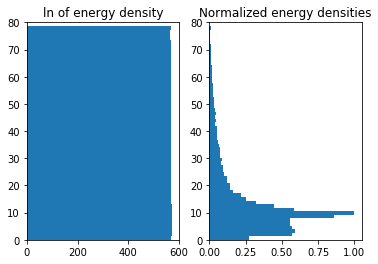

In [30]:
bins = list(freqs.keys())
values = list(freqs.values())
print('bins:\t', bins)
print('valus:\t', values)

plt.subplot(121)
plt.title("ln of energy density")
print(bins)
plt.hist(bins, weights=values, bins=len(bins), orientation='horizontal')
plt.ylim((0, 80))

plt.subplot(122)
max_val = max(values)
norm_values = [np.e ** (value - max_val) for value in values]
plt.title("Normalized energy densities")
plt.hist(bins, weights=norm_values, bins=len(bins), orientation='horizontal')
plt.ylim((0, 80))

print('densities:\t ', _get_density(norm_values))

## Manual verification

In [10]:
# line = np.arange(0, 50, 1)
# box = np.array([(x, y, z) for x in line for y in line for z in line])

# counts = list(range(10))
# energy_func = wl_configs['energy']
# for point in box:
#     counts[energy_func(point)] += 1

# brute_force_dens = _get_density(counts)
# print(brute_force_dens)